In [80]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from neurodsp import sim
from neurodsp.spectral import compute_spectrum
from galaxybrain.data_utils import load_mouse_data, return_pops, formatted_data
from galaxybrain import ramsey, plot_utils

plot_utils.rc_style(font_size=14)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
mice_regions = formatted_data([0]) #just grabbing first mouse

Mouse 1
Grabbing Spikes...
Binning Spikes...
[('CP', 176), ('FrMoCtx', 78), ('HPF', 265), ('LS', 122), ('MB', 127), ('SC', 42), ('SomMoCtx', 91), ('TH', 227), ('V1', 334)] Total: 1462
Mouse 2
Grabbing Spikes...
Binning Spikes...
[('FrCtx', 31), ('FrMoCtx', 647), ('HPF', 333), ('LS', 133), ('MB', 40), ('RSP', 112), ('SC', 98), ('SSCtx', 50), ('SomMoCtx', 220), ('TH', 638), ('UNK', 11), ('V1', 251), ('V2', 124)] Total: 2688
Mouse 3
Grabbing Spikes...
Binning Spikes...
[('CP', 134), ('FrMoCtx', 86), ('HPF', 155), ('LH', 4), ('LS', 4), ('RSP', 10), ('SomMoCtx', 10), ('TH', 1878), ('UNK', 15)] Total: 2296


/Users/brianbarry/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


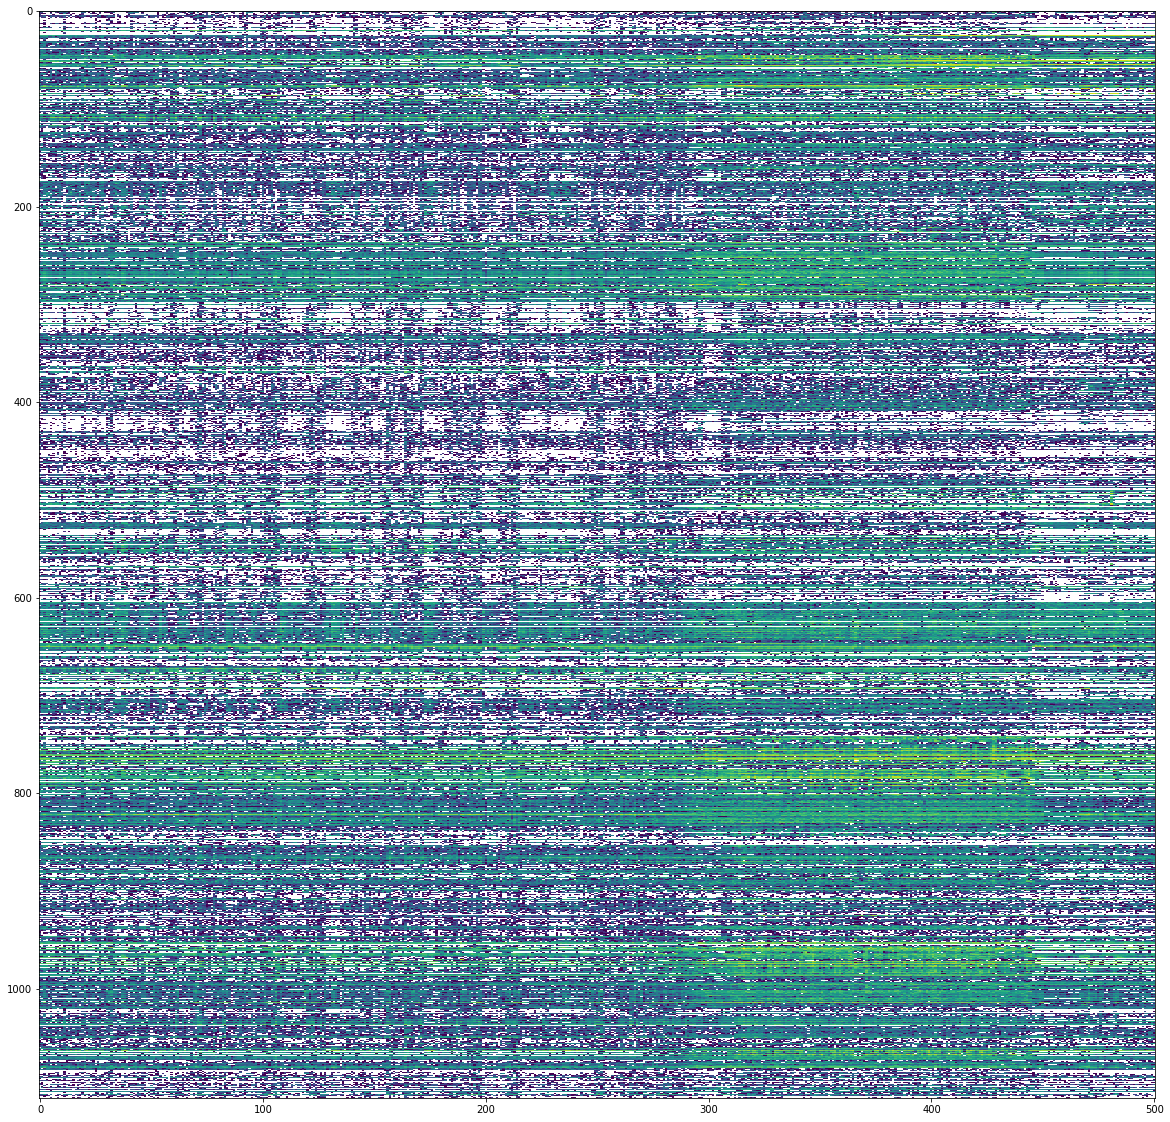

In [40]:
burn_in = 400
krebs_sample = np.log10(np.array(mice_regions['krebs'][0][0]))[burn_in:-burn_in,350:].T
plt.figure(figsize=(20,20))
plt.imshow(krebs_sample, aspect='auto')
plt.savefig('../fig/diagram/raster.svg', bbox_inches='tight')

# fill = np.ones((20,20))
# plt.imshow(fill)

next: make function for fBm to make nice spectra

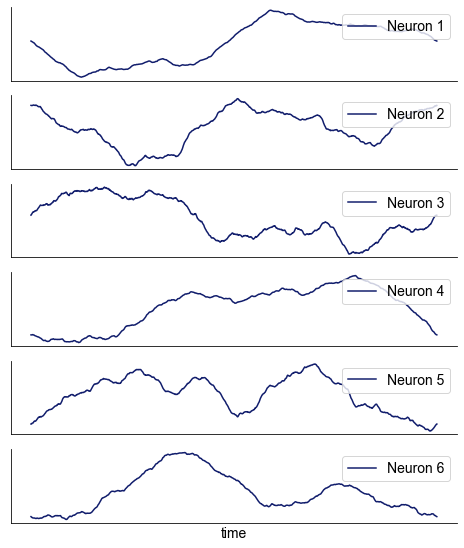

In [191]:
plt.figure(figsize=(8,16))

for i in range(6):
    signal = sim.sim_powerlaw(n_seconds=100, fs=500, exponent=-3)
    plt.subplot(10,1,i+1)
    plt.plot(signal, label = 'Neuron {}'.format(i+1))
    plt.legend(loc = 'upper right')
    plt.xticks([])
    plt.yticks([])

plt.xlabel('time')
plt.show()

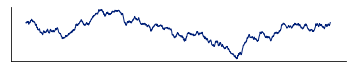

In [68]:
dummy_pop_vec = sim.sim_powerlaw(n_seconds=4, fs=500, exponent=-2.25)
plt.figure(figsize=(6,1))
plt.plot(dummy_pop_vec, lw=1, color='#002078')
plt.xticks([]);      plt.yticks([])
plt.savefig('../fig/diagram/sum.svg', bbox_inches='tight')

/Users/brianbarry/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in power
  import sys


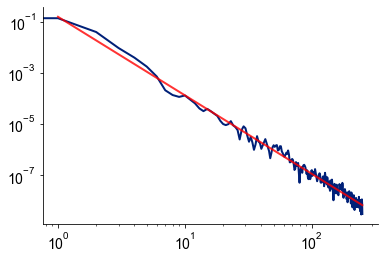

In [85]:
dummy_pop_vec = sim.sim_powerlaw(n_seconds=4, fs=500, exponent=-3)

fs=500; nperseg=fs; noverlap=250; freqs = np.fft.rfftfreq(nperseg); freq_range=None
freqs, psd = compute_spectrum(dummy_pop_vec, fs, nperseg = nperseg, noverlap = noverlap)
plt.loglog(psd.T, lw=2, color='#002078')
exp, er, of = ramsey.fooofy(freqs, psd, freq_range, group=False)
model = lambda x, offset: (10**offset)*x**-exp
plt.loglog(freqs, model(freqs, of),color='red',alpha=0.8,lw=2)

